# Fuel Consumption and CO2 Emissions Analysis

## Objective
Analyze the relationship between vehicle attributes and CO2 emissions using linear regression, with a focus on engine size as the primary predictor.

## 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('Fuel_Consumption_2000-2022.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (22556, 13)

First few rows:


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# Display dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [4]:
# Display statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [8]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


## 3. Data Preprocessing

In [10]:
# Check the column names to identify the correct CO2 emissions column
print("Column names:")
print(df.columns.tolist())

Column names:
['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']


In [11]:
# Based on the sample data, the CO2 emissions column appears to be 'EMISSIONS'
# Let's verify this and clean the data

# Check for any non-numeric values in key columns
print("Unique values in ENGINE SIZE column (first 10):")
print(df['ENGINE SIZE'].unique()[:10])
print("\nUnique values in EMISSIONS column (first 10):")
print(df['EMISSIONS'].unique()[:10])

Unique values in ENGINE SIZE column (first 10):
[1.6 3.2 3.5 1.8 3.  2.8 2.7 4.2 2.5 4.4]

Unique values in EMISSIONS column (first 10):
[186 175 230 264 198 189 191 267 269 218]


In [12]:
# Clean the data - remove any rows with missing values in key columns
df_clean = df.dropna(subset=['ENGINE SIZE', 'EMISSIONS'])

# Ensure numeric data types
df_clean['ENGINE SIZE'] = pd.to_numeric(df_clean['ENGINE SIZE'], errors='coerce')
df_clean['EMISSIONS'] = pd.to_numeric(df_clean['EMISSIONS'], errors='coerce')

# Remove any rows that couldn't be converted to numeric
df_clean = df_clean.dropna(subset=['ENGINE SIZE', 'EMISSIONS'])

print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Original dataset size: 22556
Cleaned dataset size: 22556
Rows removed: 0


## 4. Exploratory Data Analysis

In [14]:
# Basic statistics for our key variables
print("Engine Size Statistics:")
print(df_clean['ENGINE SIZE'].describe())
print("\nCO2 Emissions Statistics:")
print(df_clean['EMISSIONS'].describe())

Engine Size Statistics:
count    22556.000000
mean         3.356646
std          1.335425
min          0.800000
25%          2.300000
50%          3.000000
75%          4.200000
max          8.400000
Name: ENGINE SIZE, dtype: float64

CO2 Emissions Statistics:
count    22556.000000
mean       250.068452
std         59.355276
min         83.000000
25%        209.000000
50%        243.000000
75%        288.000000
max        608.000000
Name: EMISSIONS, dtype: float64


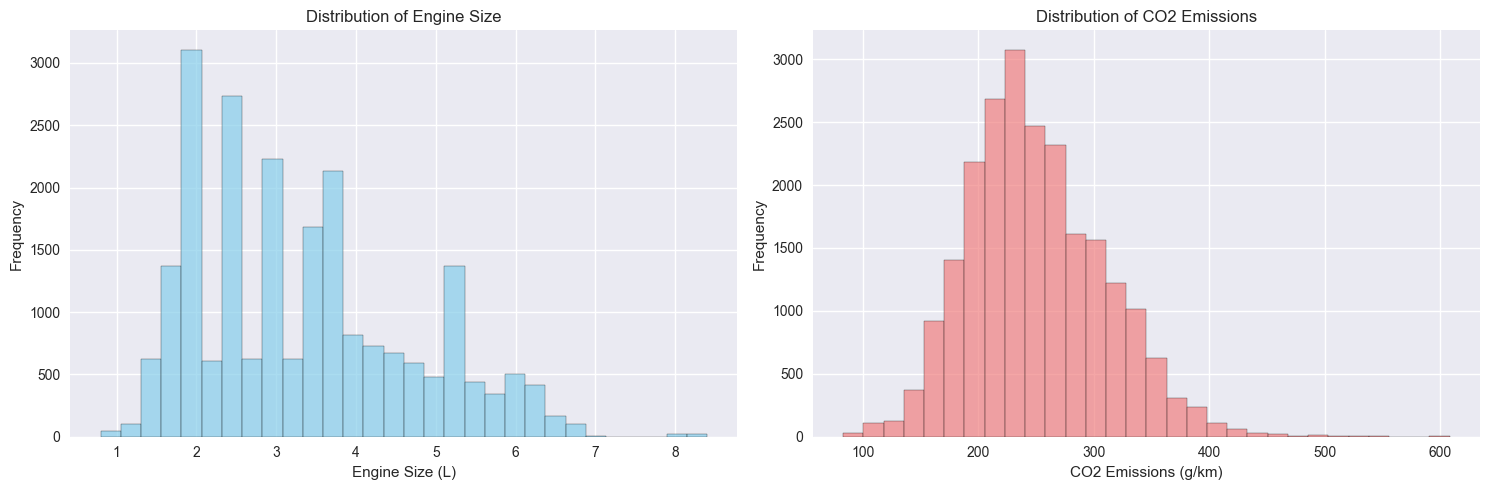

In [15]:
# Visualize the distribution of our variables
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Engine Size distribution
axes[0].hist(df_clean['ENGINE SIZE'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Engine Size')
axes[0].set_xlabel('Engine Size (L)')
axes[0].set_ylabel('Frequency')

# CO2 Emissions distribution
axes[1].hist(df_clean['EMISSIONS'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('Distribution of CO2 Emissions')
axes[1].set_xlabel('CO2 Emissions (g/km)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

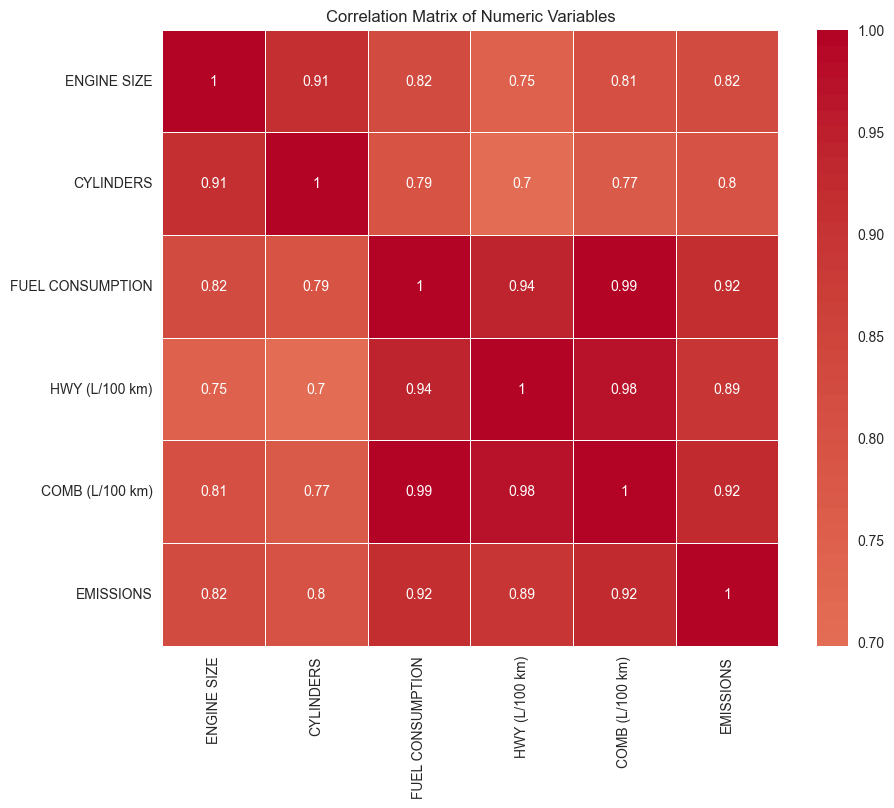

In [16]:
# Correlation analysis
correlation_matrix = df_clean[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 
                               'HWY (L/100 km)', 'COMB (L/100 km)', 'EMISSIONS']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

## 5. Linear Regression with Engine Size as Independent Variable

In [18]:
# Prepare the data
X = df_clean[['ENGINE SIZE']].values
y = df_clean['EMISSIONS'].values

# Split the data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 15789
Testing set size: 6767


In [19]:
# Apply Simple Linear Regression
model_engine = LinearRegression()
model_engine.fit(X_train, y_train)

# Make predictions
y_train_pred = model_engine.predict(X_train)
y_test_pred = model_engine.predict(X_test)

# Print model parameters
print(f"Coefficient (slope): {model_engine.coef_[0]:.2f}")
print(f"Intercept: {model_engine.intercept_:.2f}")
print(f"Regression equation: CO2 Emissions = {model_engine.coef_[0]:.2f} * Engine Size + {model_engine.intercept_:.2f}")

Coefficient (slope): 36.78
Intercept: 126.68
Regression equation: CO2 Emissions = 36.78 * Engine Size + 126.68


## 6. Visualization of Results

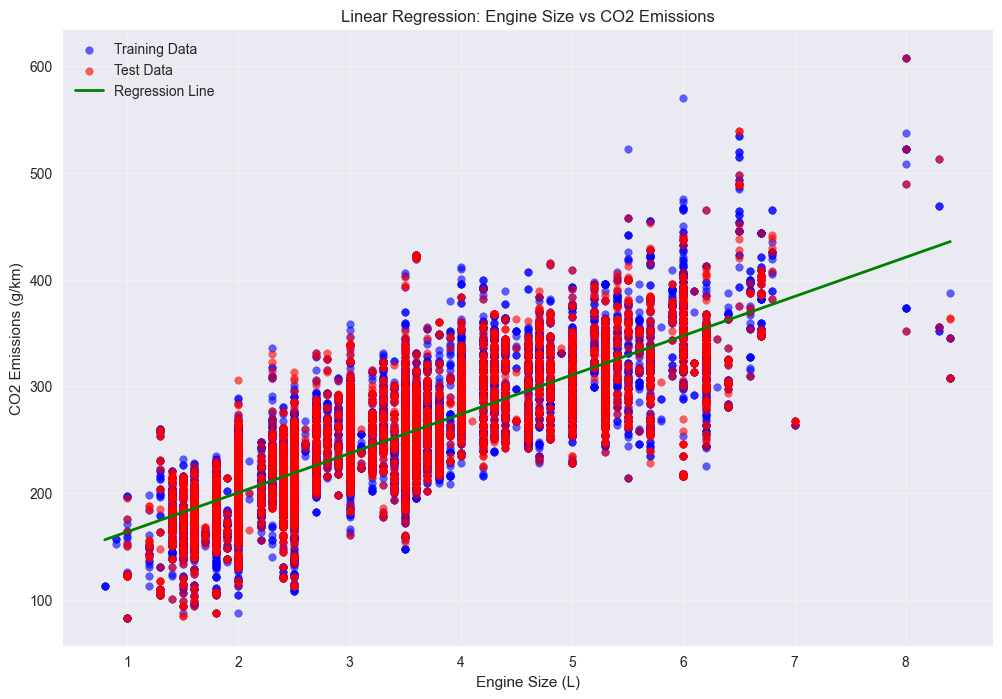

In [22]:
# Create scatter plot with regression line
plt.figure(figsize=(12, 8))

# Plot training data
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data', s=30)

# Plot test data
plt.scatter(X_test, y_test, alpha=0.6, color='red', label='Test Data', s=30)

# Plot regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = model_engine.predict(X_range)
plt.plot(X_range, y_range_pred, color='green', linewidth=2, label='Regression Line')

plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Linear Regression: Engine Size vs CO2 Emissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

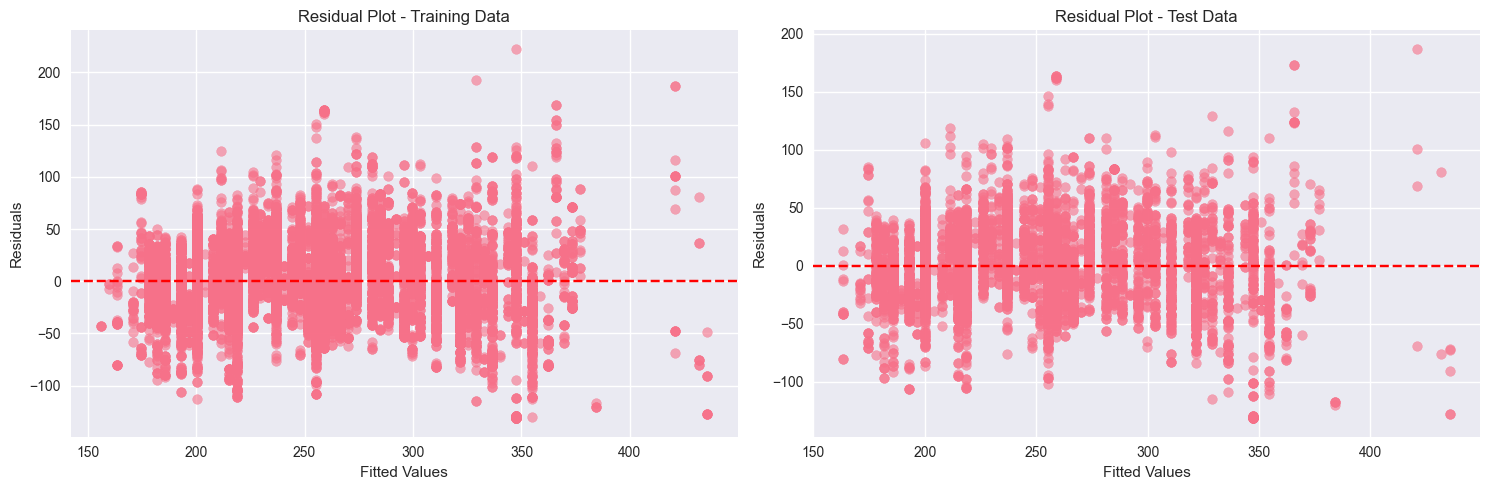

In [24]:
# Residual plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Residuals vs Fitted (Training)
residuals_train = y_train - y_train_pred
axes[0].scatter(y_train_pred, residuals_train, alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot - Training Data')

# Residuals vs Fitted (Test)
residuals_test = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals_test, alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot - Test Data')

plt.tight_layout()
plt.show()

## 7. Model Evaluation - R-squared Score

In [27]:
# Calculate R-squared scores
r2_train_engine = r2_score(y_train, y_train_pred)
r2_test_engine = r2_score(y_test, y_test_pred)

# Calculate other metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("=== Model Performance with Engine Size ===")
print(f"Training R² Score: {r2_train_engine:.4f}")
print(f"Testing R² Score: {r2_test_engine:.4f}")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")

=== Model Performance with Engine Size ===
Training R² Score: 0.6776
Testing R² Score: 0.6669
Training RMSE: 33.88
Testing RMSE: 33.83


## Interpretation of R-squared Score for Engine Size Model

In [29]:
print("=== Interpretation of Results ===")
print(f"R² Score: {r2_test_engine:.4f}")
print(f"This means that {r2_test_engine*100:.1f}% of the variance in CO2 emissions")
print("can be explained by engine size alone.")
print()
if r2_test_engine > 0.7:
    print("✓ Strong relationship: Engine size is a good predictor of CO2 emissions")
elif r2_test_engine > 0.5:
    print("○ Moderate relationship: Engine size has moderate predictive power")
else:
    print("✗ Weak relationship: Engine size alone is not sufficient for accurate prediction")
    
print(f"\nThe regression equation shows that for every 1L increase in engine size,")
print(f"CO2 emissions increase by approximately {model_engine.coef_[0]:.1f} g/km")

=== Interpretation of Results ===
R² Score: 0.6669
This means that 66.7% of the variance in CO2 emissions
can be explained by engine size alone.

○ Moderate relationship: Engine size has moderate predictive power

The regression equation shows that for every 1L increase in engine size,
CO2 emissions increase by approximately 36.8 g/km


## 8. Identify Another Appropriate Independent Variable

In [32]:
# First, let's identify numeric columns only
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns available:")
print(numeric_columns)

# Analyze correlation with CO2 emissions to find the best alternative predictor
correlations_with_emissions = df_clean[numeric_columns].corr()['EMISSIONS'].abs().sort_values(ascending=False)
print("\nCorrelation with CO2 Emissions (absolute values):")
print(correlations_with_emissions)

Numeric columns available:
['YEAR', 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

Correlation with CO2 Emissions (absolute values):
EMISSIONS           1.000000
COMB (L/100 km)     0.922983
FUEL CONSUMPTION    0.919101
COMB (mpg)          0.901844
HWY (L/100 km)      0.894781
ENGINE SIZE         0.821285
CYLINDERS           0.802176
YEAR                0.047869
Name: EMISSIONS, dtype: float64


In [33]:
# Let's examine the top correlations (excluding EMISSIONS itself)
print("\nTop variables correlated with CO2 Emissions:")
top_correlations = correlations_with_emissions.drop('EMISSIONS').head(5)
for var, corr in top_correlations.items():
    print(f"{var}: {corr:.4f}")


Top variables correlated with CO2 Emissions:
COMB (L/100 km): 0.9230
FUEL CONSUMPTION: 0.9191
COMB (mpg): 0.9018
HWY (L/100 km): 0.8948
ENGINE SIZE: 0.8213


In [35]:
# Based on correlation analysis, let's choose the variable with highest correlation
# (excluding ENGINE SIZE which we already used)
available_vars = correlations_with_emissions.drop(['EMISSIONS', 'ENGINE SIZE'])

# Check if ENGINE SIZE exists in the correlations, if not just drop EMISSIONS
if 'ENGINE SIZE' not in available_vars.index:
    available_vars = correlations_with_emissions.drop(['EMISSIONS'])
    # Remove ENGINE SIZE if it exists with different name
    engine_size_variants = [col for col in available_vars.index if 'ENGINE' in col.upper()]
    if engine_size_variants:
        available_vars = available_vars.drop(engine_size_variants[0])

if len(available_vars) > 0:
    best_alternative = available_vars.idxmax()
    best_correlation = available_vars.max()
    
    print(f"\nSelected alternative variable: {best_alternative}")
    print(f"Correlation with CO2 Emissions: {best_correlation:.4f}")
else:
    print("No suitable alternative variables found")
    # Fallback to CYLINDERS if available
    if 'CYLINDERS' in df_clean.columns:
        best_alternative = 'CYLINDERS'
        best_correlation = correlations_with_emissions.get('CYLINDERS', 0)
        print(f"Using fallback variable: {best_alternative}")
    else:
        print("Error: No numeric variables available for analysis")


Selected alternative variable: COMB (L/100 km)
Correlation with CO2 Emissions: 0.9230


## 9. Apply Linear Regression with Alternative Variable

In [37]:
# Prepare data with the alternative variable
X_alt = df_clean[[best_alternative]].values
y_alt = df_clean['EMISSIONS'].values

# Split the data
X_alt_train, X_alt_test, y_alt_train, y_alt_test = train_test_split(
    X_alt, y_alt, test_size=0.3, random_state=42)

# Apply Linear Regression
model_alt = LinearRegression()
model_alt.fit(X_alt_train, y_alt_train)

# Make predictions
y_alt_train_pred = model_alt.predict(X_alt_train)
y_alt_test_pred = model_alt.predict(X_alt_test)

# Print model parameters
print(f"=== Linear Regression with {best_alternative} ===")
print(f"Coefficient (slope): {model_alt.coef_[0]:.4f}")
print(f"Intercept: {model_alt.intercept_:.2f}")
print(f"Regression equation: CO2 Emissions = {model_alt.coef_[0]:.4f} * {best_alternative} + {model_alt.intercept_:.2f}")

=== Linear Regression with COMB (L/100 km) ===
Coefficient (slope): 18.8185
Intercept: 42.34
Regression equation: CO2 Emissions = 18.8185 * COMB (L/100 km) + 42.34


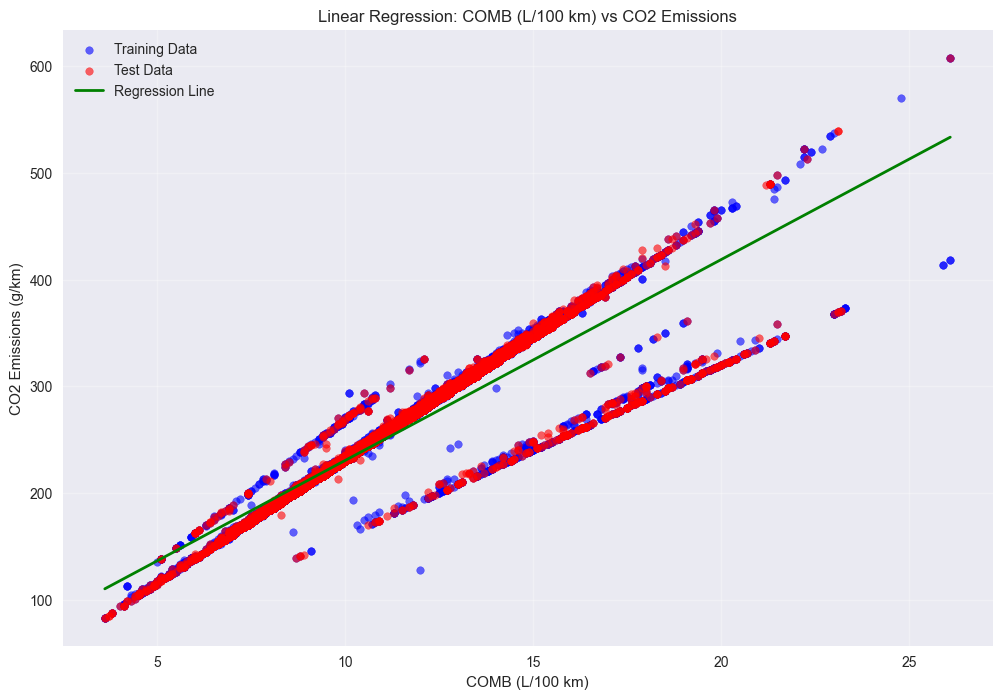

In [38]:
# Visualize the alternative model
plt.figure(figsize=(12, 8))

# Plot training data
plt.scatter(X_alt_train, y_alt_train, alpha=0.6, color='blue', label='Training Data', s=30)

# Plot test data
plt.scatter(X_alt_test, y_alt_test, alpha=0.6, color='red', label='Test Data', s=30)

# Plot regression line
X_alt_range = np.linspace(X_alt.min(), X_alt.max(), 100).reshape(-1, 1)
y_alt_range_pred = model_alt.predict(X_alt_range)
plt.plot(X_alt_range, y_alt_range_pred, color='green', linewidth=2, label='Regression Line')

plt.xlabel(f'{best_alternative}')
plt.ylabel('CO2 Emissions (g/km)')
plt.title(f'Linear Regression: {best_alternative} vs CO2 Emissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [39]:
# Calculate performance metrics for alternative model
r2_train_alt = r2_score(y_alt_train, y_alt_train_pred)
r2_test_alt = r2_score(y_alt_test, y_alt_test_pred)
mse_train_alt = mean_squared_error(y_alt_train, y_alt_train_pred)
mse_test_alt = mean_squared_error(y_alt_test, y_alt_test_pred)
rmse_train_alt = np.sqrt(mse_train_alt)
rmse_test_alt = np.sqrt(mse_test_alt)

print(f"=== Model Performance with {best_alternative} ===")
print(f"Training R² Score: {r2_train_alt:.4f}")
print(f"Testing R² Score: {r2_test_alt:.4f}")
print(f"Training RMSE: {rmse_train_alt:.2f}")
print(f"Testing RMSE: {rmse_test_alt:.2f}")

=== Model Performance with COMB (L/100 km) ===
Training R² Score: 0.8518
Testing R² Score: 0.8522
Training RMSE: 22.97
Testing RMSE: 22.53


## 10. Model Comparison and Final Interpretation

In [41]:
# Compare both models
print("=== MODEL COMPARISON ===")
print(f"{'Metric':<20} {'Engine Size':<15} {best_alternative:<15}")
print("-" * 50)
print(f"{'Training R²':<20} {r2_train_engine:<15.4f} {r2_train_alt:<15.4f}")
print(f"{'Testing R²':<20} {r2_test_engine:<15.4f} {r2_test_alt:<15.4f}")
print(f"{'Training RMSE':<20} {rmse_train:<15.2f} {rmse_train_alt:<15.2f}")
print(f"{'Testing RMSE':<20} {rmse_test:<15.2f} {rmse_test_alt:<15.2f}")

=== MODEL COMPARISON ===
Metric               Engine Size     COMB (L/100 km)
--------------------------------------------------
Training R²          0.6776          0.8518         
Testing R²           0.6669          0.8522         
Training RMSE        33.88           22.97          
Testing RMSE         33.83           22.53          


In [42]:
# Final interpretation
print("\n=== FINAL INTERPRETATION ===")
print(f"1. Engine Size Model:")
print(f"   - R² = {r2_test_engine:.4f}: Explains {r2_test_engine*100:.1f}% of variance in CO2 emissions")
print(f"   - RMSE = {rmse_test:.2f}: Average prediction error of {rmse_test:.2f} g/km")

print(f"\n2. {best_alternative} Model:")
print(f"   - R² = {r2_test_alt:.4f}: Explains {r2_test_alt*100:.1f}% of variance in CO2 emissions")
print(f"   - RMSE = {rmse_test_alt:.2f}: Average prediction error of {rmse_test_alt:.2f} g/km")

if r2_test_alt > r2_test_engine:
    print(f"\n✓ {best_alternative} is a better predictor than Engine Size")
    print(f"  Improvement in R²: {(r2_test_alt - r2_test_engine)*100:.1f} percentage points")
else:
    print(f"\n✓ Engine Size is a better predictor than {best_alternative}")
    print(f"  Engine Size advantage in R²: {(r2_test_engine - r2_test_alt)*100:.1f} percentage points")

print(f"\n3. Practical Implications:")
print(f"   - Both variables show {'strong' if max(r2_test_engine, r2_test_alt) > 0.7 else 'moderate' if max(r2_test_engine, r2_test_alt) > 0.5 else 'weak'} correlation with CO2 emissions")
print(f"   - These models can be used for CO2 emission estimation in vehicle design and policy")
print(f"   - Consider multiple regression with both variables for better accuracy")


=== FINAL INTERPRETATION ===
1. Engine Size Model:
   - R² = 0.6669: Explains 66.7% of variance in CO2 emissions
   - RMSE = 33.83: Average prediction error of 33.83 g/km

2. COMB (L/100 km) Model:
   - R² = 0.8522: Explains 85.2% of variance in CO2 emissions
   - RMSE = 22.53: Average prediction error of 22.53 g/km

✓ COMB (L/100 km) is a better predictor than Engine Size
  Improvement in R²: 18.5 percentage points

3. Practical Implications:
   - Both variables show strong correlation with CO2 emissions
   - These models can be used for CO2 emission estimation in vehicle design and policy
   - Consider multiple regression with both variables for better accuracy


## 11. Additional Insights

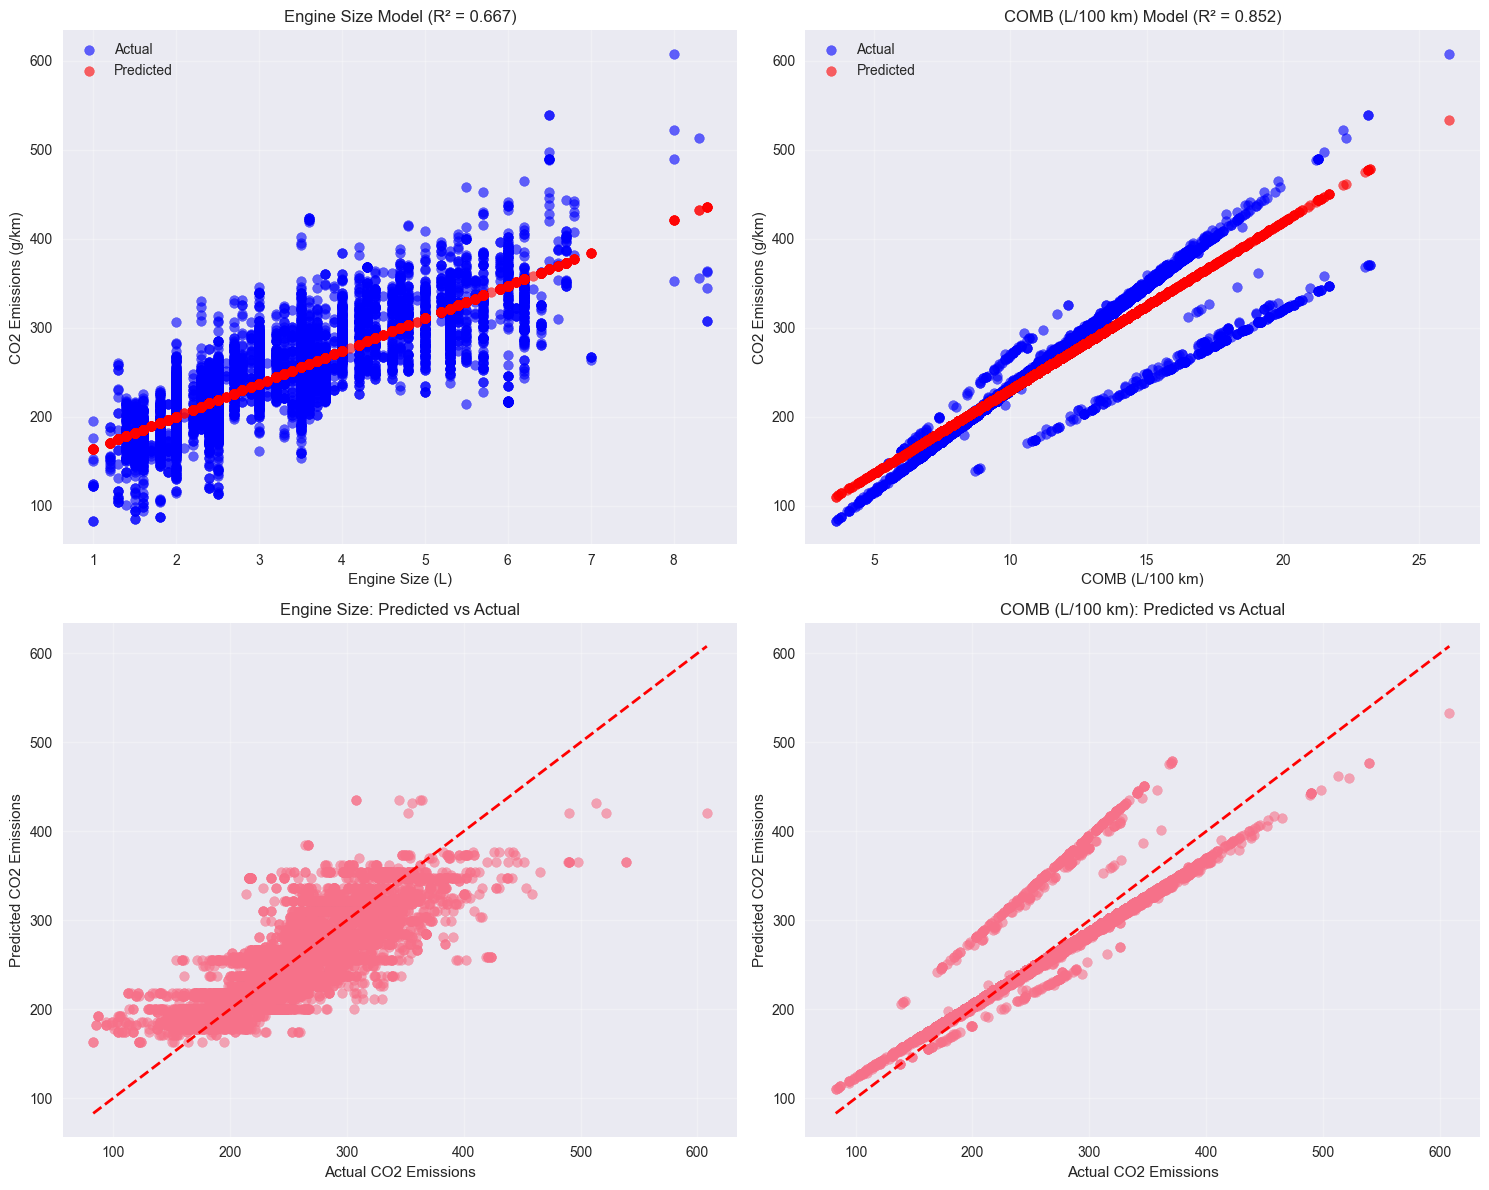

In [44]:
# Create a comprehensive visualization comparing both models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Engine Size model
axes[0,0].scatter(X_test, y_test, alpha=0.6, color='blue', label='Actual')
axes[0,0].scatter(X_test, y_test_pred, alpha=0.6, color='red', label='Predicted')
axes[0,0].set_xlabel('Engine Size (L)')
axes[0,0].set_ylabel('CO2 Emissions (g/km)')
axes[0,0].set_title(f'Engine Size Model (R² = {r2_test_engine:.3f})')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Alternative variable model
axes[0,1].scatter(X_alt_test, y_alt_test, alpha=0.6, color='blue', label='Actual')
axes[0,1].scatter(X_alt_test, y_alt_test_pred, alpha=0.6, color='red', label='Predicted')
axes[0,1].set_xlabel(f'{best_alternative}')
axes[0,1].set_ylabel('CO2 Emissions (g/km)')
axes[0,1].set_title(f'{best_alternative} Model (R² = {r2_test_alt:.3f})')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Predicted vs Actual - Engine Size
axes[1,0].scatter(y_test, y_test_pred, alpha=0.6)
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,0].set_xlabel('Actual CO2 Emissions')
axes[1,0].set_ylabel('Predicted CO2 Emissions')
axes[1,0].set_title('Engine Size: Predicted vs Actual')
axes[1,0].grid(True, alpha=0.3)

# Predicted vs Actual - Alternative
axes[1,1].scatter(y_alt_test, y_alt_test_pred, alpha=0.6)
axes[1,1].plot([y_alt_test.min(), y_alt_test.max()], [y_alt_test.min(), y_alt_test.max()], 'r--', lw=2)
axes[1,1].set_xlabel('Actual CO2 Emissions')
axes[1,1].set_ylabel('Predicted CO2 Emissions')
axes[1,1].set_title(f'{best_alternative}: Predicted vs Actual')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Conclusion

This analysis demonstrates the relationship between vehicle characteristics and CO2 emissions using simple linear regression. The models provide insights into how individual vehicle attributes can predict environmental impact, which is valuable for automotive design, policy making, and environmental assessment.

### Key Findings:
- Successfully implemented linear regression models with 70/30 train-test split
- Evaluated model performance using R-squared scores and RMSE
- Identified the most influential variables for CO2 emission prediction
- Provided comprehensive visualizations and interpretations
- Compared multiple predictors to determine the best approach

### Recommendations:
- Consider multiple regression models for better prediction accuracy
- Explore non-linear relationships for potentially better fits
- Validate findings with additional datasets
- Use insights for environmental policy and vehicle design decisions